In [21]:
%load_ext autoreload
%autoreload 2

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dotenv

from tiled.client import from_uri

from tr_ap_xps.writer import XPSDataSet

dotenv.load_dotenv()

client = from_uri("http://localhost:8000/api", api_key=os.getenv("TILED_SINGLE_USER_API_KEY"))
if client.get("runs") is None:
    client.create_container("runs")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
xps_dataset = XPSDataSet(client, "xps22")

for x in range(1000):
    frame = np.random.rand(500, 1000)
    xps_dataset.new_frame(frame)

xps_dataset.finish()

In [27]:
xps_dataset.timing_node.read()

,_compute_mean,_tiled_update_lines_raw,_tiled_update_lines_filtered
0,0.000357,0.258946,0.176794
1,0.000226,0.107404,0.104218
2,0.000218,0.110674,0.172730
3,0.000225,0.104302,0.105835
4,0.000218,0.109458,0.118168
...,...,...,...
995,0.000236,0.095205,0.161499
996,0.000229,0.093127,0.094906
997,0.000224,0.091028,0.100090
998,0.000225,0.166209,0.097953


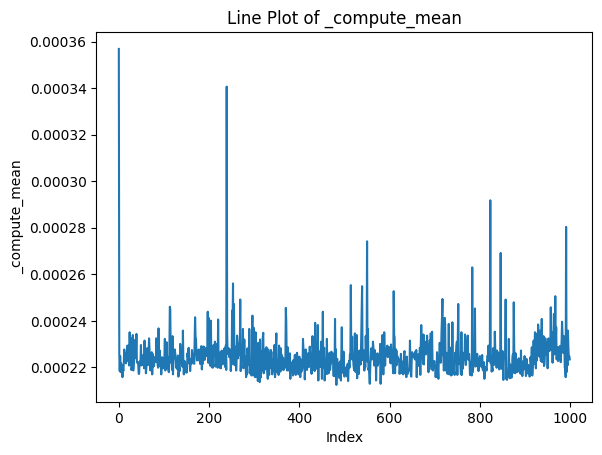

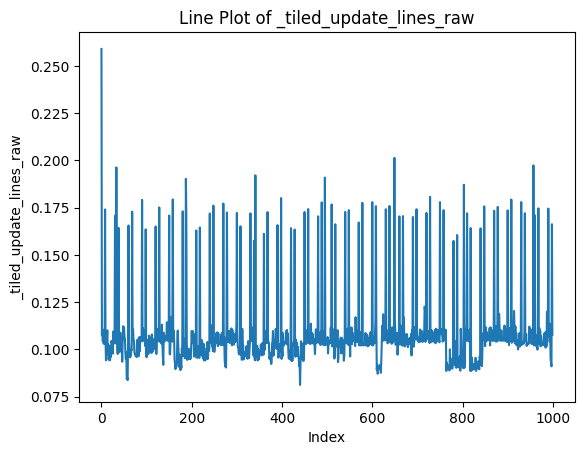

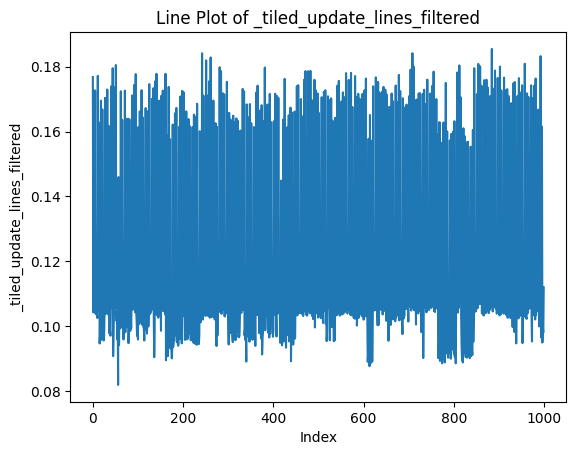

/tmp/ipykernel_148983/1313616871.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


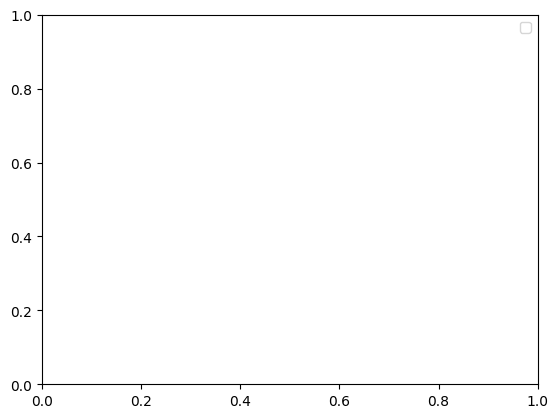

In [28]:


data = xps_dataset.timing_node.read()

for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(data[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
    plt.show()

plt.legend()
plt.show()

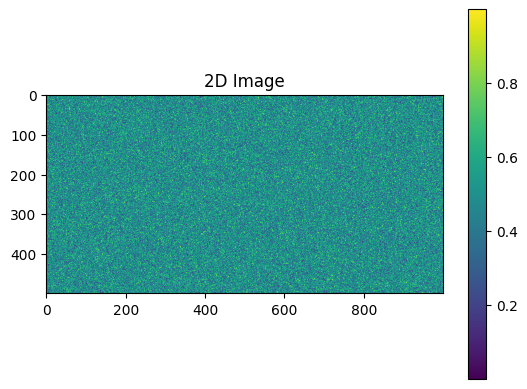

In [37]:
xps_dataset.lines_raw_node.read()

plt.imshow(frame)
plt.colorbar()
plt.title('2D Image')
plt.show()